# Assignment 2

### Question 5

In [13]:
import vugrad as vg
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#Sets value to a 2x2 np array of random values
x = vg.TensorNode(np.random.randn(2, 2))

In [15]:
a = vg.TensorNode(np.random.randn(3, 3))
b = vg.TensorNode(np.random.randn(3, 3))

c = a + b

### Question 10

In [16]:
standard_accuracy = [
    0.1178, 0.8958, 0.9194, 0.9196, 0.9374, 0.9444, 0.9478, 0.9504, 0.947, 
    0.9514, 0.9558, 0.9606, 0.958, 0.958, 0.9602, 0.962, 0.9586, 0.9628, 
    0.9628, 0.9606
]

standard_loss = [
    1.068e+03, 0.4253, 0.2724, 0.216, 0.1717, 0.137, 0.1209, 0.1069, 0.09408, 
    0.08601, 0.07264, 0.06557, 0.06824, 0.06054, 0.05341, 0.05073, 0.04783, 
    0.04596, 0.04334, 0.0446
]

all_accuracy = [
    0.096, 0.0946, 0.1048, 0.0954, 0.1012, 0.0946, 0.121, 0.0934, 0.0954,
    0.0958, 0.0946, 0.0958, 0.1012, 0.0946, 0.121, 0.0994, 0.0934, 0.0974,
    0.0946, 0.121
]

all_loss = [
    9.875e+28, 1.162e+07, 1.148e+03, 1.076e+03, 1.001e+03, 967.9, 935.4, 
    899.7, 889.7, 885.9, 857.9, 855.3, 860.1, 851.5, 828.3, 845.7, 822.4,
    831.1, 844.5, 843.4
]


Model 1 - hidden layer size 6

In [17]:
model1_accuracy = [
    0.103, 0.818, 0.9286, 0.9324, 0.9384, 0.95, 0.9528, 0.9474, 0.9546, 0.9524,
    0.9606, 0.9542, 0.9608, 0.9524, 0.959, 0.963, 0.9598, 0.9608, 0.9586, 0.9622
]

model1_loss = [
    3.091e+04, 0.463, 0.27, 0.1901, 0.1569, 0.1445, 0.1151, 0.09504, 0.09072, 0.07932,
    0.06792, 0.06112, 0.06263, 0.06042, 0.05825, 0.04547, 0.04842, 0.04229, 0.04472, 0.0372
]


Model 2 - He initialization

In [18]:
model2_accuracy = [
    0.0884, 0.9018, 0.9204, 0.9342, 0.9324, 0.9394, 0.9444, 0.9458, 0.9486, 0.9518,
    0.95, 0.9508, 0.9518, 0.9548, 0.9544, 0.9536, 0.956, 0.9558, 0.9542, 0.953
]

model2_loss = [
    2e+03, 0.4176, 0.2783, 0.2, 0.1676, 0.1372, 0.1166, 0.1035, 0.09378, 0.08752,
    0.07778, 0.0695, 0.06388, 0.06, 0.05672, 0.04969, 0.04617, 0.0453, 0.0368, 0.03579
]

Model 3 - Deeper network

In [19]:
model3_accuracy = [
    0.0948, 0.8886, 0.916, 0.9332, 0.9386, 0.934, 0.942, 0.9468, 0.9468, 0.9486,
    0.9524, 0.9522, 0.9494, 0.9558, 0.9566, 0.9554, 0.9564, 0.9556, 0.957, 0.9564
]

model3_loss = [
    453.1, 0.3516, 0.2152, 0.149, 0.1108, 0.08324, 0.06651, 0.05338, 0.04214, 0.03429,
    0.02775, 0.02218, 0.01696, 0.01407, 0.01223, 0.009991, 0.008734, 0.007182, 0.006099,
    0.004945
]

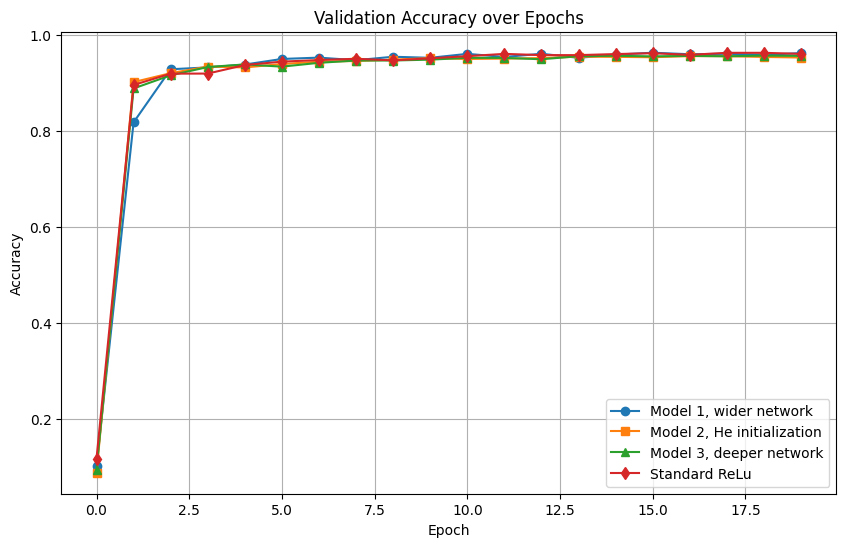

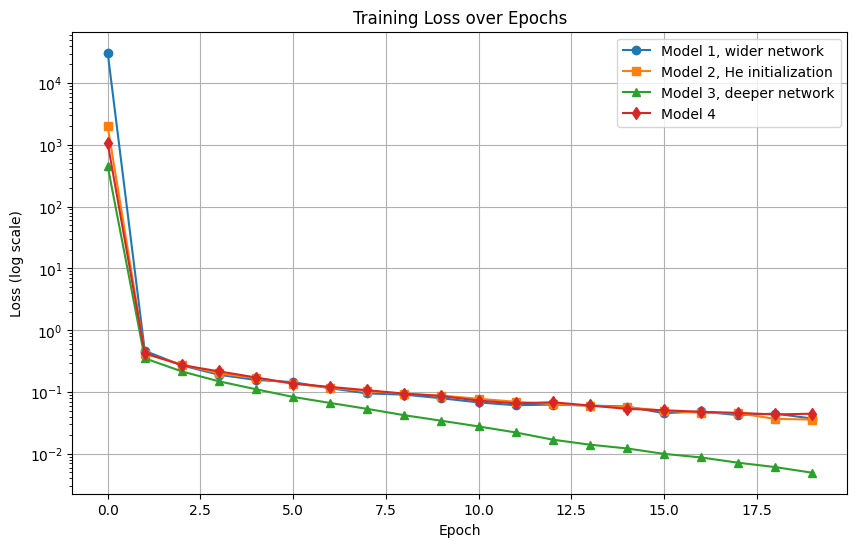

In [20]:
epochs = list(range(len(model1_accuracy)))

# Plot Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, model1_accuracy, label='Model 1, wider network', marker='o')
plt.plot(epochs, model2_accuracy, label='Model 2, He initialization', marker='s')
plt.plot(epochs, model3_accuracy, label='Model 3, deeper network', marker='^')
plt.plot(epochs, standard_accuracy, label='Standard ReLu', marker='d')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, model1_loss, label='Model 1, wider network', marker='o')
plt.plot(epochs, model2_loss, label='Model 2, He initialization', marker='s')
plt.plot(epochs, model3_loss, label='Model 3, deeper network', marker='^')
plt.plot(epochs, standard_loss, label='Model 4', marker='d')
plt.yscale('log')  # Log scale for better visualization due to large values
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (log scale)')
plt.legend()
plt.grid(True)
plt.show()


### Question 11

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [22]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [23]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

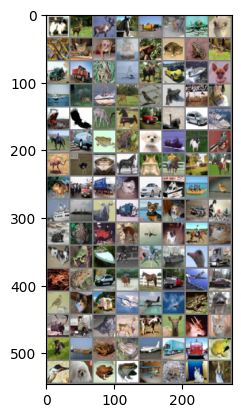

dog   deer  deer  horse plane deer  plane bird  bird  cat   dog   ship  frog  cat   frog  deer  truck truck frog  ship  deer  car   ship  dog   plane deer  ship  deer  bird  frog  horse cat   ship  bird  deer  horse car   bird  car   ship  horse car   frog  frog  dog   ship  cat   bird  bird  bird  ship  horse frog  horse truck horse frog  car   truck cat   car   ship  ship  bird  ship  ship  deer  truck dog   dog   frog  cat   cat   frog  truck deer  plane dog   horse dog   dog   frog  ship  horse horse ship  bird  truck frog  frog  car   horse horse truck plane car   bird  cat   truck plane plane plane frog  bird  deer  truck cat   deer  horse deer  deer  cat   dog   ship  frog  frog  plane truck truck frog  bird  dog   frog  frog  plane frog  cat   bird 


In [24]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [25]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [26]:
criterion = nn.CrossEntropyLoss()

In [27]:
def get_training_accuracy(model, trainloader, device):
    correct = 0
    total = 0
    model.eval()  # turn off dropout/batchnorm
    with torch.no_grad():
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    model.train()  # turn back on
    return 100 * correct / total


In [ ]:
import itertools

epochs = [5, 10]
learning_rates = [0.01, 0.001, 0.003]
momentums = [0.9, 0.8]
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
train_subset, val_subset = torch.utils.data.random_split(trainset, [train_size, val_size])

for batch_size in [64, 128]:
    trainloader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
    valloader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size,
                           shuffle=False, num_workers=2)
    
    for epoch, learning_rate, momentum in itertools.product(epochs, learning_rates, momentums):
        net = Net().to(device)
        optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)
        accuracy_score = 0
        for ep in range(epoch):  # loop over the dataset multiple times

            running_loss = 0.0
            for i, data in enumerate(trainloader, 0):
                # get the inputs; data is a list of [inputs, labels]
                inputs, labels = data

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                
                running_loss += loss.item()
        acc = get_training_accuracy(net, trainloader, device)
        val_acc = get_training_accuracy(net, valloader, device)
        print(f'Epoch: {epoch}, batch_size:{batch_size}, lr:{learning_rate}, momentum: {momentum}, training accuracy: {acc}, val accuracy: {val_acc}')

print('Finished Training')

Epoch: 5, batch_size:64, lr:0.01, momentum: 0.9, training accuracy: 64.7525, val accuracy: 60.07
Epoch: 5, batch_size:64, lr:0.01, momentum: 0.8, training accuracy: 57.4275, val accuracy: 55.11
Epoch: 5, batch_size:64, lr:0.001, momentum: 0.9, training accuracy: 42.4475, val accuracy: 41.42
Epoch: 5, batch_size:64, lr:0.001, momentum: 0.8, training accuracy: 31.015, val accuracy: 30.73
Epoch: 5, batch_size:64, lr:0.003, momentum: 0.9, training accuracy: 56.5175, val accuracy: 55.18
Epoch: 5, batch_size:64, lr:0.003, momentum: 0.8, training accuracy: 45.95, val accuracy: 44.7
Epoch: 10, batch_size:64, lr:0.01, momentum: 0.9, training accuracy: 72.82, val accuracy: 61.31
Epoch: 10, batch_size:64, lr:0.01, momentum: 0.8, training accuracy: 68.355, val accuracy: 61.51
Epoch: 10, batch_size:64, lr:0.001, momentum: 0.9, training accuracy: 50.785, val accuracy: 49.22
Epoch: 10, batch_size:64, lr:0.001, momentum: 0.8, training accuracy: 39.555, val accuracy: 38.57
Epoch: 10, batch_size:64, lr:

python(8199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8200) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 5, batch_size:128, lr:0.01, momentum: 0.9, training accuracy: 57.3975, val accuracy: 55.66


python(8285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8317) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8445) MallocStackLoggin

Epoch: 5, batch_size:128, lr:0.01, momentum: 0.8, training accuracy: 51.29, val accuracy: 49.62


python(8499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8538) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8579) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8622) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8641) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8667) MallocStackLoggin

Epoch: 5, batch_size:128, lr:0.001, momentum: 0.9, training accuracy: 25.3275, val accuracy: 25.15


python(8712) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8715) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8769) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8772) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8822) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8824) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8849) MallocStackLoggin

Epoch: 5, batch_size:128, lr:0.001, momentum: 0.8, training accuracy: 13.5025, val accuracy: 13.09


python(8906) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8947) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9061) MallocStackLoggin

Epoch: 5, batch_size:128, lr:0.003, momentum: 0.9, training accuracy: 45.9875, val accuracy: 44.62


python(9103) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9104) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


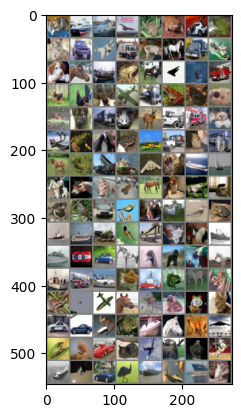

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 9 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 99.8 %
Accuracy for class: dog   is 0.0 %
Accuracy for class: frog  is 0.0 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 0.0 %
